# Final Project

Team 5: Mathia Quimpo, Matthew Chin

In [20]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
# load data
raw_df = pd.read_csv('https://github.com/mchin10/BSAN-6070/blob/main/Final%20Project/climate_change_data.csv?raw=true')
raw_df

Date           Location                Country  Temperature  \
0     00:00.0    New Williamtown                 Latvia    10.688986   
1     09:43.3       North Rachel           South Africa    13.814430   
2     19:26.5   West Williamland          French Guiana    27.323718   
3     29:09.8        South David                Vietnam    12.309581   
4     38:53.0     New Scottburgh                Moldova    13.210885   
...       ...                ...                    ...          ...   
9995  21:07.0   South Elaineberg                 Bhutan    15.020523   
9996  30:50.2       Leblancville                  Congo    16.772451   
9997  40:33.5     West Stephanie              Argentina    22.370025   
9998  50:16.7        Port Steven                Albania    19.430853   
9999  00:00.0  West Anthonyburgh  Sao Tome and Principe    12.661928   

      CO2 Emissions  Sea Level Rise  Precipitation   Humidity  Wind Speed  
0        403.118902        0.717506      13.835237  23.631256   18.492026  
1        396.663499        1.205715      40.974084  43.982946   34.249300  
2        451.553155       -0.160783      42.697931  96.652600   34.124261  
3        422.404984       -0.475931       5.193341  47.467938    8.554563  
4        410.472999        1.135757      78.695280  61.789672    8.001164  
...             ...             ...            ...        ...         ...  
9995     391.379537       -1.452243      93.417109  25.293814    6.531866  
9996     346.921190        0.543616      49.882947  96.787402   42.249014  
9997     466.042136        1.026704      30.659841  15.211825   18.293708  
9998     337.899776       -0.895329      18.932275  82.774520   42.424255  
9999     381.172746        2.260788      78.339658  99.243923   41.856539  

[10000 rows x 9 columns]

In [50]:
# get information
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            10000 non-null  object 
 1   Location        10000 non-null  object 
 2   Country         10000 non-null  object 
 3   Temperature     10000 non-null  float64
 4   CO2 Emissions   10000 non-null  float64
 5   Sea Level Rise  10000 non-null  float64
 6   Precipitation   10000 non-null  float64
 7   Humidity        10000 non-null  float64
 8   Wind Speed      10000 non-null  float64
dtypes: float64(6), object(3)
memory usage: 703.3+ KB


In [51]:
raw_df.isnull().sum()

Date              0
Location          0
Country           0
Temperature       0
CO2 Emissions     0
Sea Level Rise    0
Precipitation     0
Humidity          0
Wind Speed        0
dtype: int64

In [52]:
raw_df.duplicated().sum()

0

In [55]:
# one-hot encode countries
oh_encoder = OneHotEncoder()
oe_encoded_countries = oh_encoder.fit_transform(raw_df[["Country"]])
ohe_df = pd.DataFrame(oe_encoded_countries.toarray(), columns=oh_encoder.categories_)
ohe_df

Afghanistan Albania Algeria American Samoa Andorra Angola Anguilla  \
0            0.0     0.0     0.0            0.0     0.0    0.0      0.0   
1            0.0     0.0     0.0            0.0     0.0    0.0      0.0   
2            0.0     0.0     0.0            0.0     0.0    0.0      0.0   
3            0.0     0.0     0.0            0.0     0.0    0.0      0.0   
4            0.0     0.0     0.0            0.0     0.0    0.0      0.0   
...          ...     ...     ...            ...     ...    ...      ...   
9995         0.0     0.0     0.0            0.0     0.0    0.0      0.0   
9996         0.0     0.0     0.0            0.0     0.0    0.0      0.0   
9997         0.0     0.0     0.0            0.0     0.0    0.0      0.0   
9998         0.0     1.0     0.0            0.0     0.0    0.0      0.0   
9999         0.0     0.0     0.0            0.0     0.0    0.0      0.0   

     Antarctica (the territory South of 60 deg S) Antigua and Barbuda  \
0                                             0.0                 0.0   
1                                             0.0                 0.0   
2                                             0.0                 0.0   
3                                             0.0                 0.0   
4                                             0.0                 0.0   
...                                           ...                 ...   
9995                                          0.0                 0.0   
9996                                          0.0                 0.0   
9997                                          0.0                 0.0   
9998                                          0.0                 0.0   
9999                                          0.0                 0.0   

     Argentina  ... Uruguay Uzbekistan Vanuatu Venezuela Vietnam  \
0          0.0  ...     0.0        0.0     0.0       0.0     0.0   
1          0.0  ...     0.0        0.0     0.0       0.0     0.0   
2          0.0  ...     0.0        0.0     0.0       0.0     0.0   
3          0.0  ...     0.0        0.0     0.0       0.0     1.0   
4          0.0  ...     0.0        0.0     0.0       0.0     0.0   
...        ...  ...     ...        ...     ...       ...     ...   
9995       0.0  ...     0.0        0.0     0.0       0.0     0.0   
9996       0.0  ...     0.0        0.0     0.0       0.0     0.0   
9997       1.0  ...     0.0        0.0     0.0       0.0     0.0   
9998       0.0  ...     0.0        0.0     0.0       0.0     0.0   
9999       0.0  ...     0.0        0.0     0.0       0.0     0.0   

     Wallis and Futuna Western Sahara Yemen Zambia Zimbabwe  
0                  0.0            0.0   0.0    0.0      0.0  
1                  0.0            0.0   0.0    0.0      0.0  
2                  0.0            0.0   0.0    0.0      0.0  
3                  0.0            0.0   0.0    0.0      0.0  
4                  0.0            0.0   0.0    0.0      0.0  
...                ...            ...   ...    ...      ...  
9995               0.0            0.0   0.0    0.0      0.0  
9996               0.0            0.0   0.0    0.0      0.0  
9997               0.0            0.0   0.0    0.0      0.0  
9998               0.0            0.0   0.0    0.0      0.0  
9999               0.0            0.0   0.0    0.0      0.0  

[10000 rows x 243 columns]

In [56]:
# drop columns
raw_df.drop(columns=['Date','Location', 'Country'], inplace=True)

In [57]:
raw_df.head()

Temperature  CO2 Emissions  Sea Level Rise  Precipitation   Humidity  \
0    10.688986     403.118902        0.717506      13.835237  23.631256   
1    13.814430     396.663499        1.205715      40.974084  43.982946   
2    27.323718     451.553155       -0.160783      42.697931  96.652600   
3    12.309581     422.404984       -0.475931       5.193341  47.467938   
4    13.210885     410.472999        1.135757      78.695280  61.789672   

   Wind Speed  
0   18.492026  
1   34.249300  
2   34.124261  
3    8.554563  
4    8.001164

In [58]:
raw_df.describe()

Temperature  CO2 Emissions  Sea Level Rise  Precipitation  \
count  10000.000000   10000.000000    10000.000000   10000.000000   
mean      14.936034     400.220469       -0.003152      49.881208   
std        5.030616      49.696933        0.991349      28.862417   
min       -3.803589     182.131220       -4.092155       0.010143   
25%       11.577991     367.109330       -0.673809      24.497516   
50%       14.981136     400.821324        0.002332      49.818967   
75%       18.305826     433.307905        0.675723      74.524991   
max       33.976956     582.899701        4.116559      99.991900   

           Humidity    Wind Speed  
count  10000.000000  10000.000000  
mean      49.771302     25.082066  
std       28.929320     14.466648  
min        0.018998      0.001732  
25%       24.713250     12.539733  
50%       49.678412     24.910787  
75%       75.206390     37.670260  
max       99.959665     49.997664

/Users/mayi/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


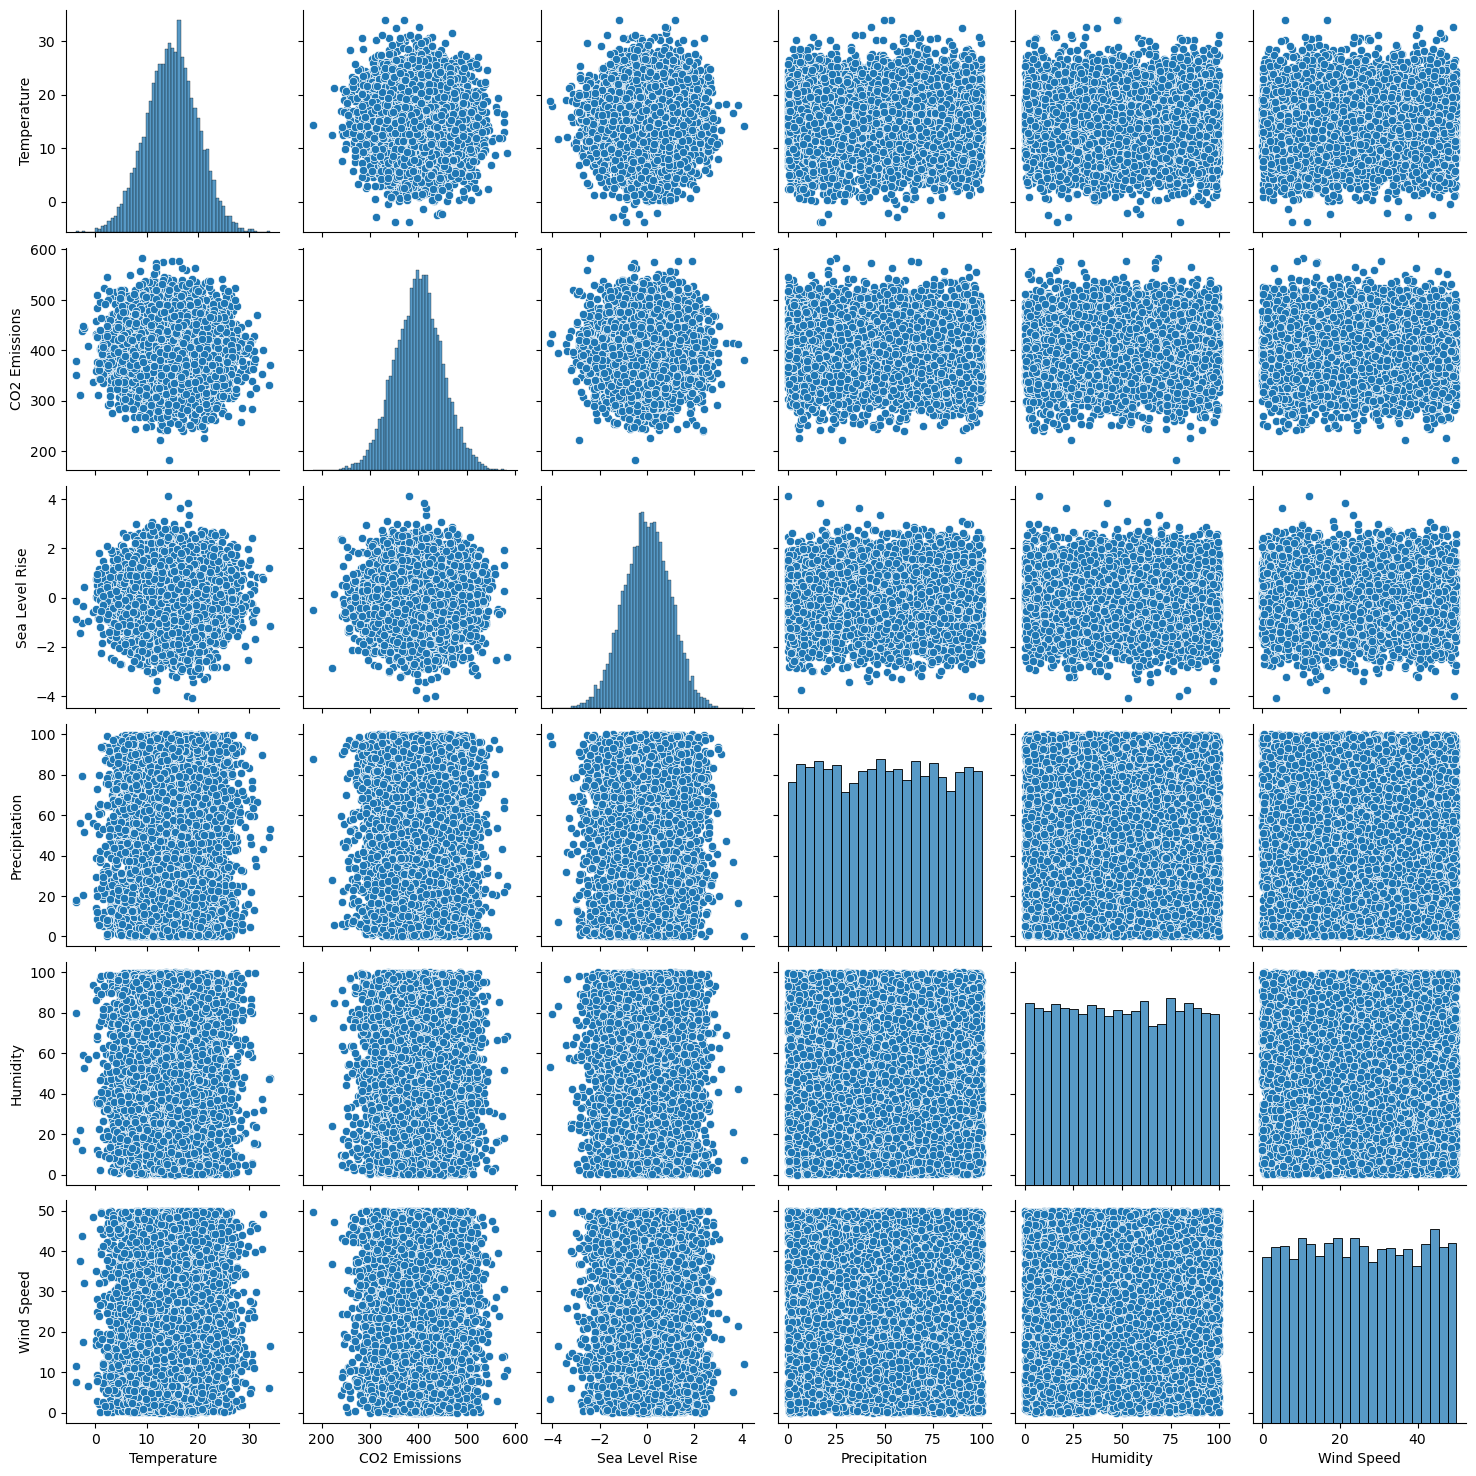

In [59]:
sns.pairplot(raw_df)

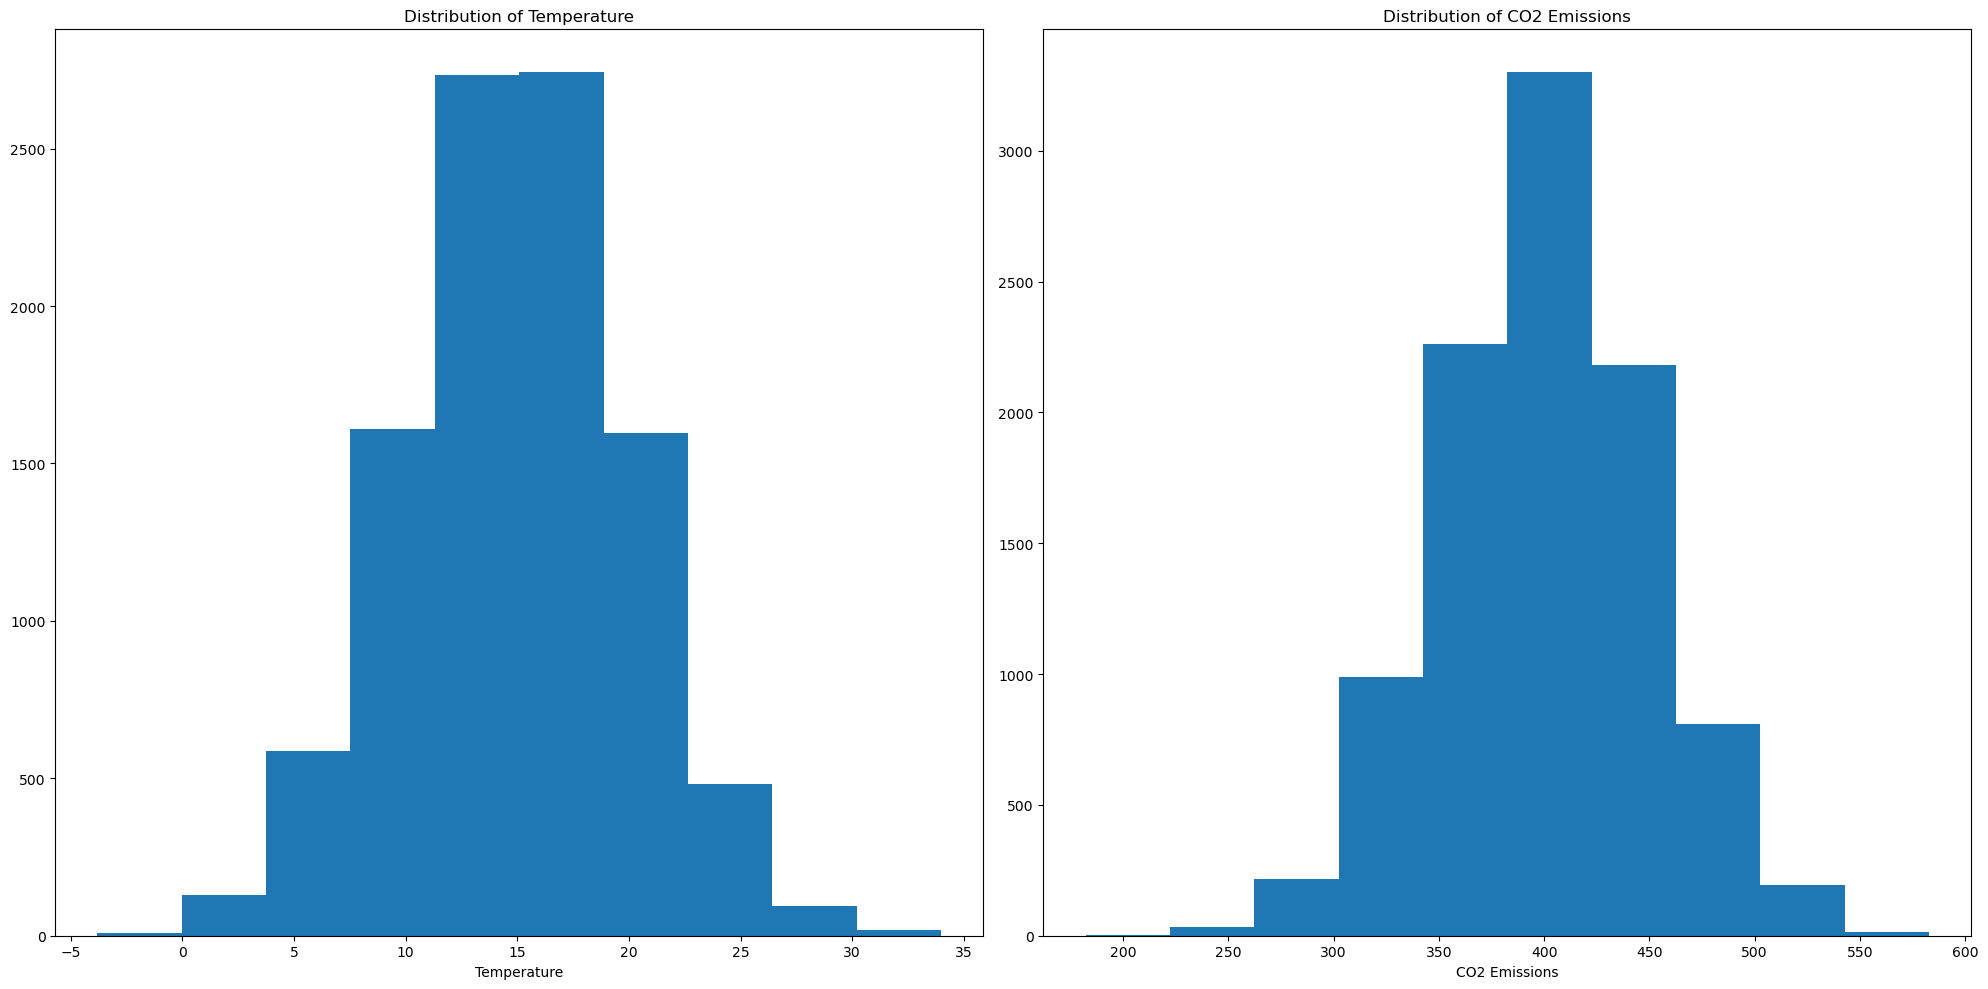

In [60]:
# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# Histogram for Temperature
axes[0].hist(raw_df['Temperature'])
axes[0].set_xlabel('Temperature')
axes[0].set_title('Distribution of Temperature')

# Histogram for CO2 Emissions
axes[1].hist(raw_df['CO2 Emissions'])
axes[1].set_xlabel('CO2 Emissions')
axes[1].set_title('Distribution of CO2 Emissions')

plt.tight_layout()
plt.show()

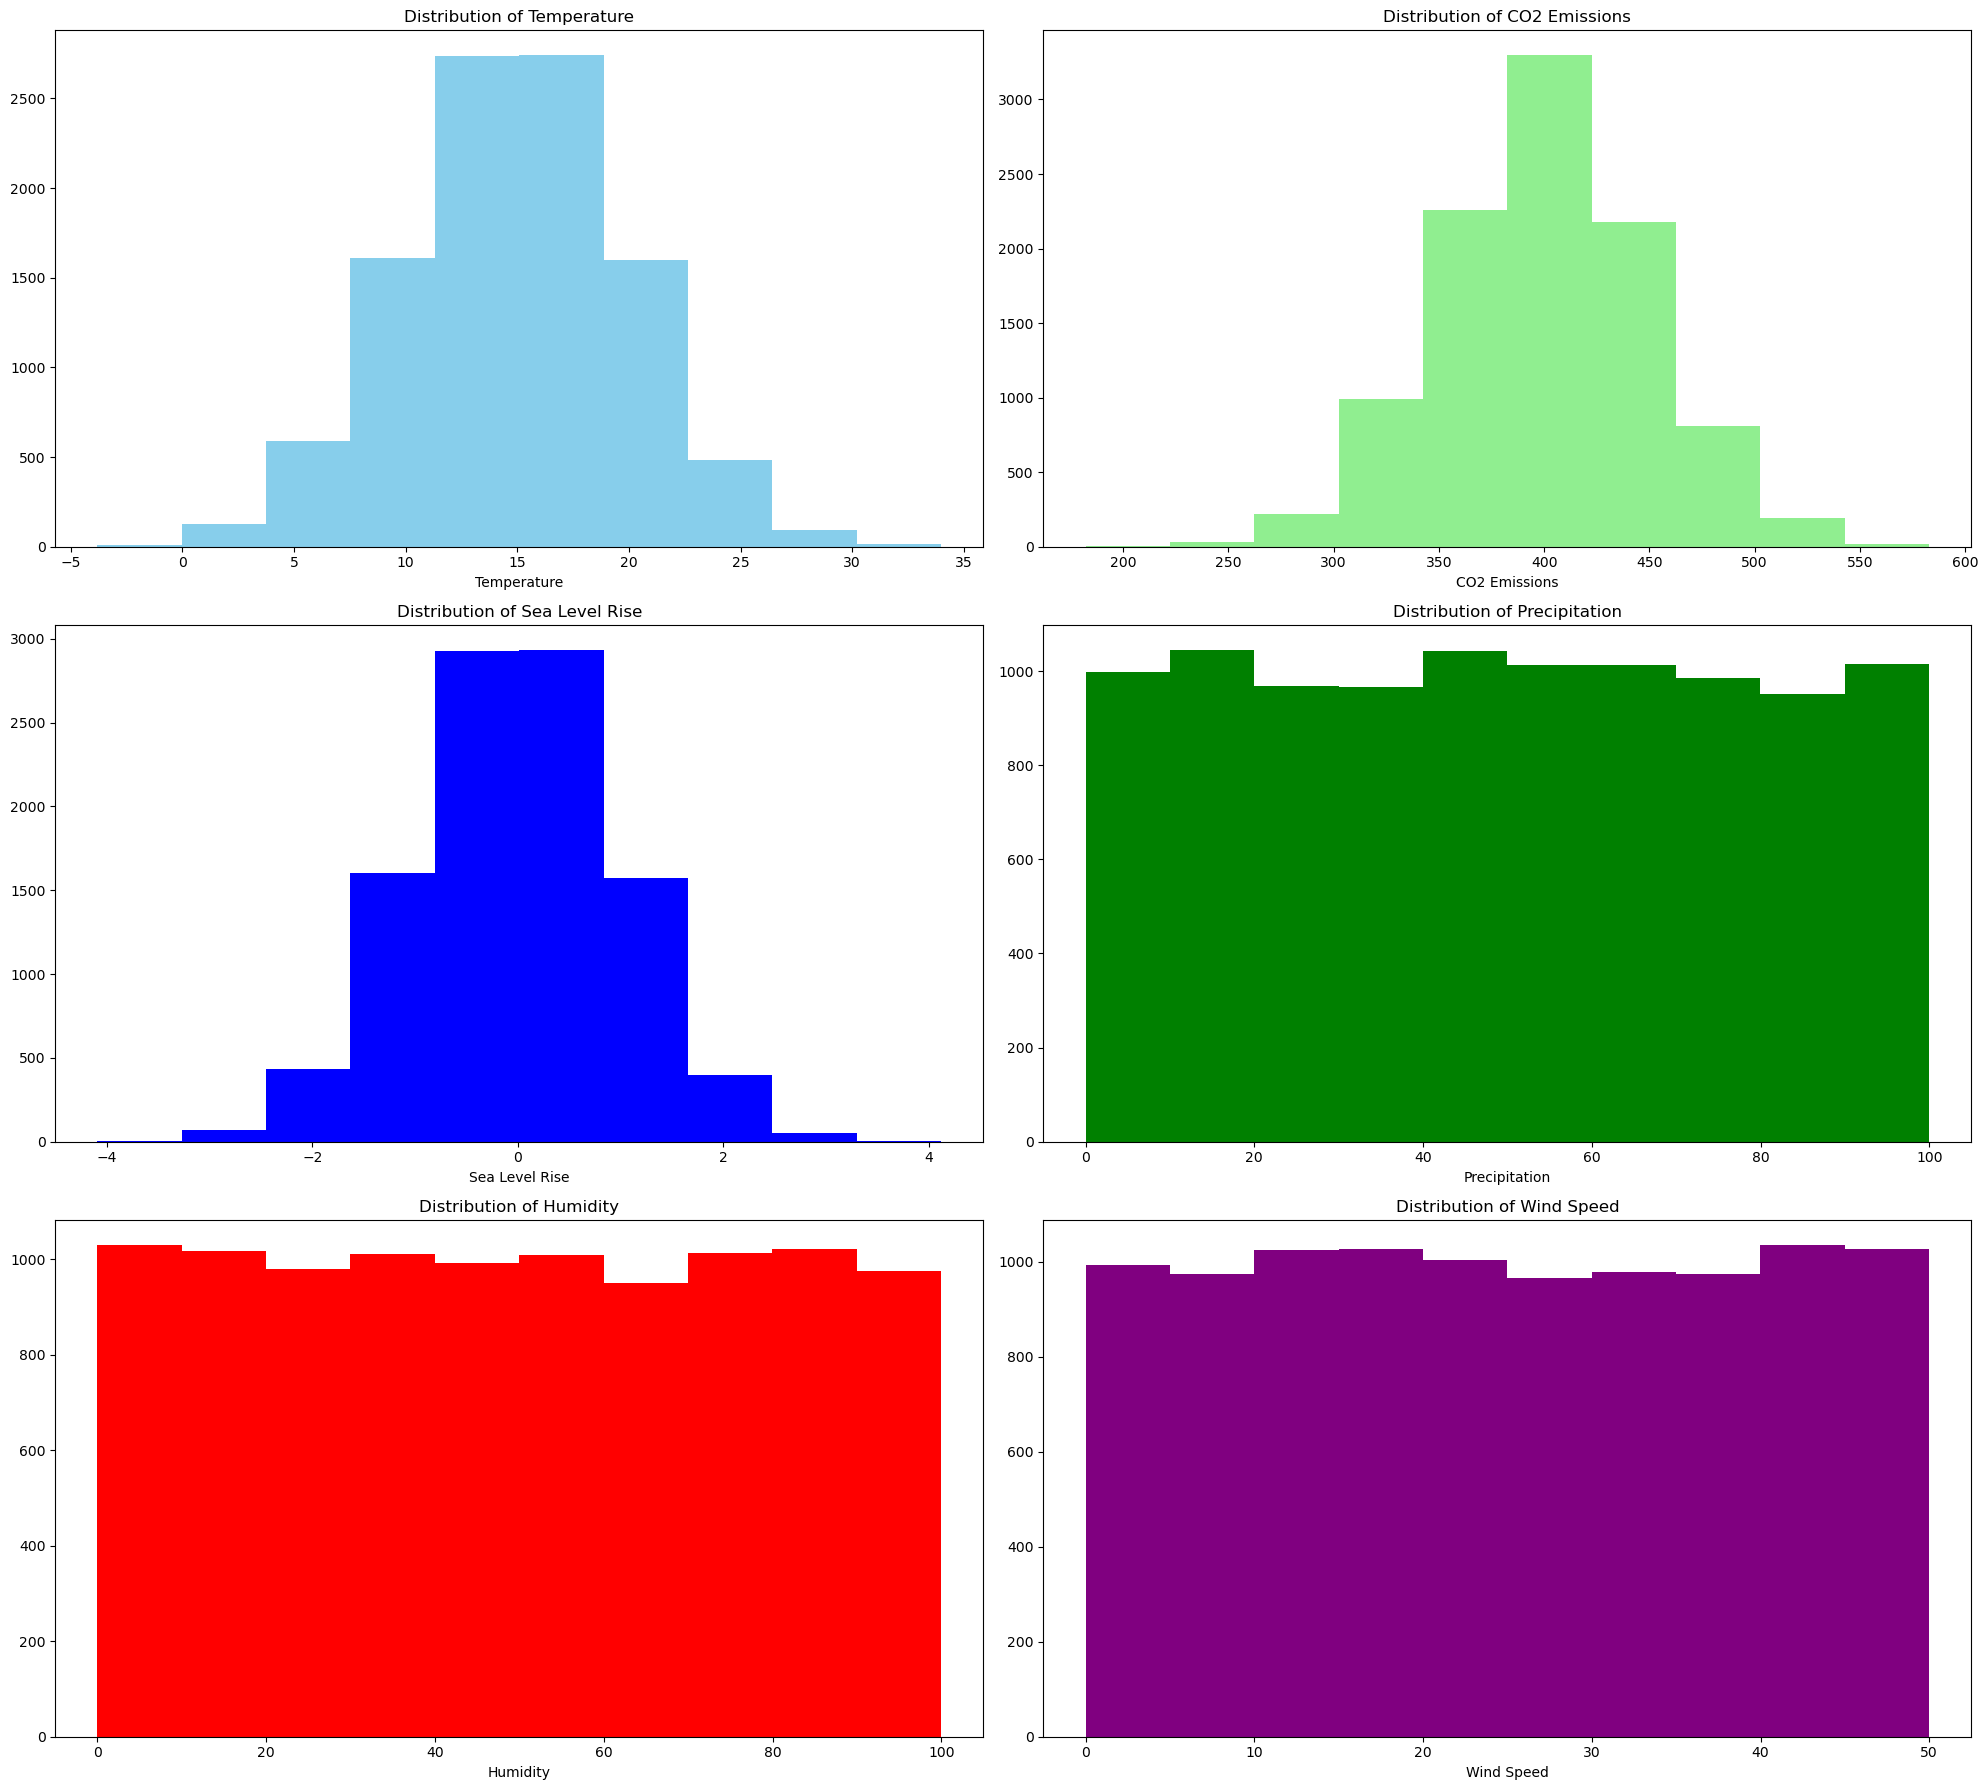

In [68]:
# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 18))

# Histogram for Temperature
axes[0, 0].hist(raw_df['Temperature'], color='skyblue')
axes[0, 0].set_xlabel('Temperature')
axes[0, 0].set_title('Distribution of Temperature')

# Histogram for CO2 Emissions
axes[0, 1].hist(raw_df['CO2 Emissions'], color='lightgreen')
axes[0, 1].set_xlabel('CO2 Emissions')
axes[0, 1].set_title('Distribution of CO2 Emissions')

# Histogram for Sea Level Rise
axes[1, 0].hist(raw_df['Sea Level Rise'], color='blue')
axes[1, 0].set_xlabel('Sea Level Rise')
axes[1, 0].set_title('Distribution of Sea Level Rise')

# Histogram for Precipitation
axes[1, 1].hist(raw_df['Precipitation'], color='green')
axes[1, 1].set_xlabel('Precipitation')
axes[1, 1].set_title('Distribution of Precipitation')

# Histogram for Humidity
axes[2, 0].hist(raw_df['Humidity'], color='red')
axes[2, 0].set_xlabel('Humidity')
axes[2, 0].set_title('Distribution of Humidity')

# Histogram for Wind Speed
axes[2, 1].hist(raw_df['Wind Speed'], color='purple')
axes[2, 1].set_xlabel('Wind Speed')
axes[2, 1].set_title('Distribution of Wind Speed')

plt.tight_layout()
plt.show()

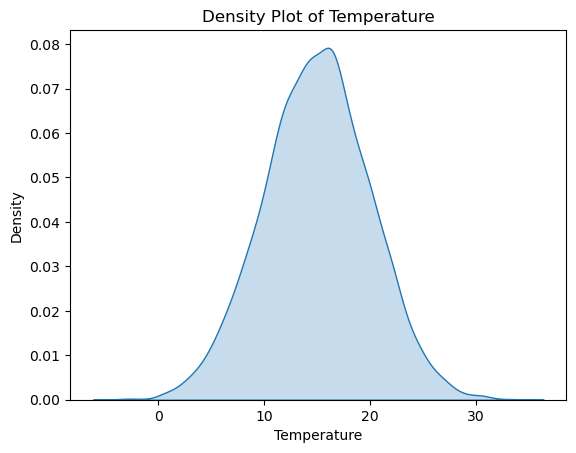

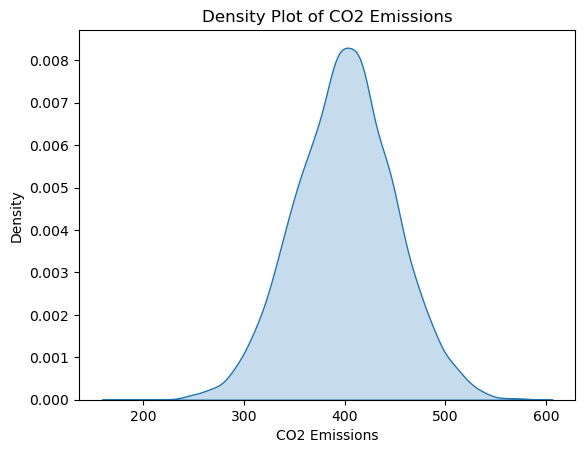

In [61]:
sns.kdeplot(data=raw_df, x='Temperature', fill=True)
plt.title('Density Plot of Temperature')
plt.show()

sns.kdeplot(data=raw_df, x='CO2 Emissions', fill=True)
plt.title('Density Plot of CO2 Emissions')
plt.show()


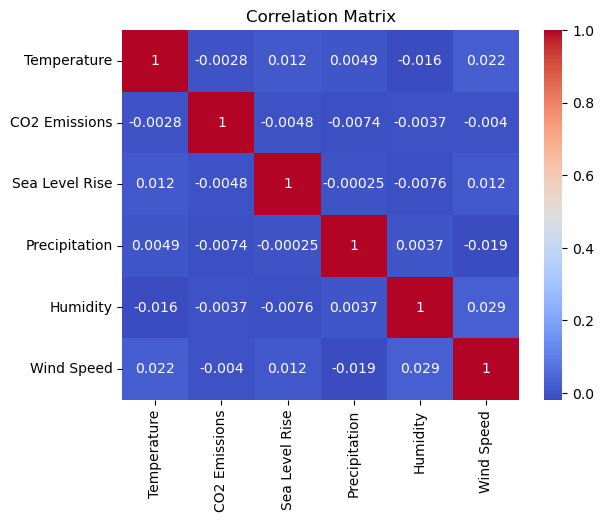

In [47]:
# Correlation matrix heatmap
corr = raw_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

/Users/mayi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mayi/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


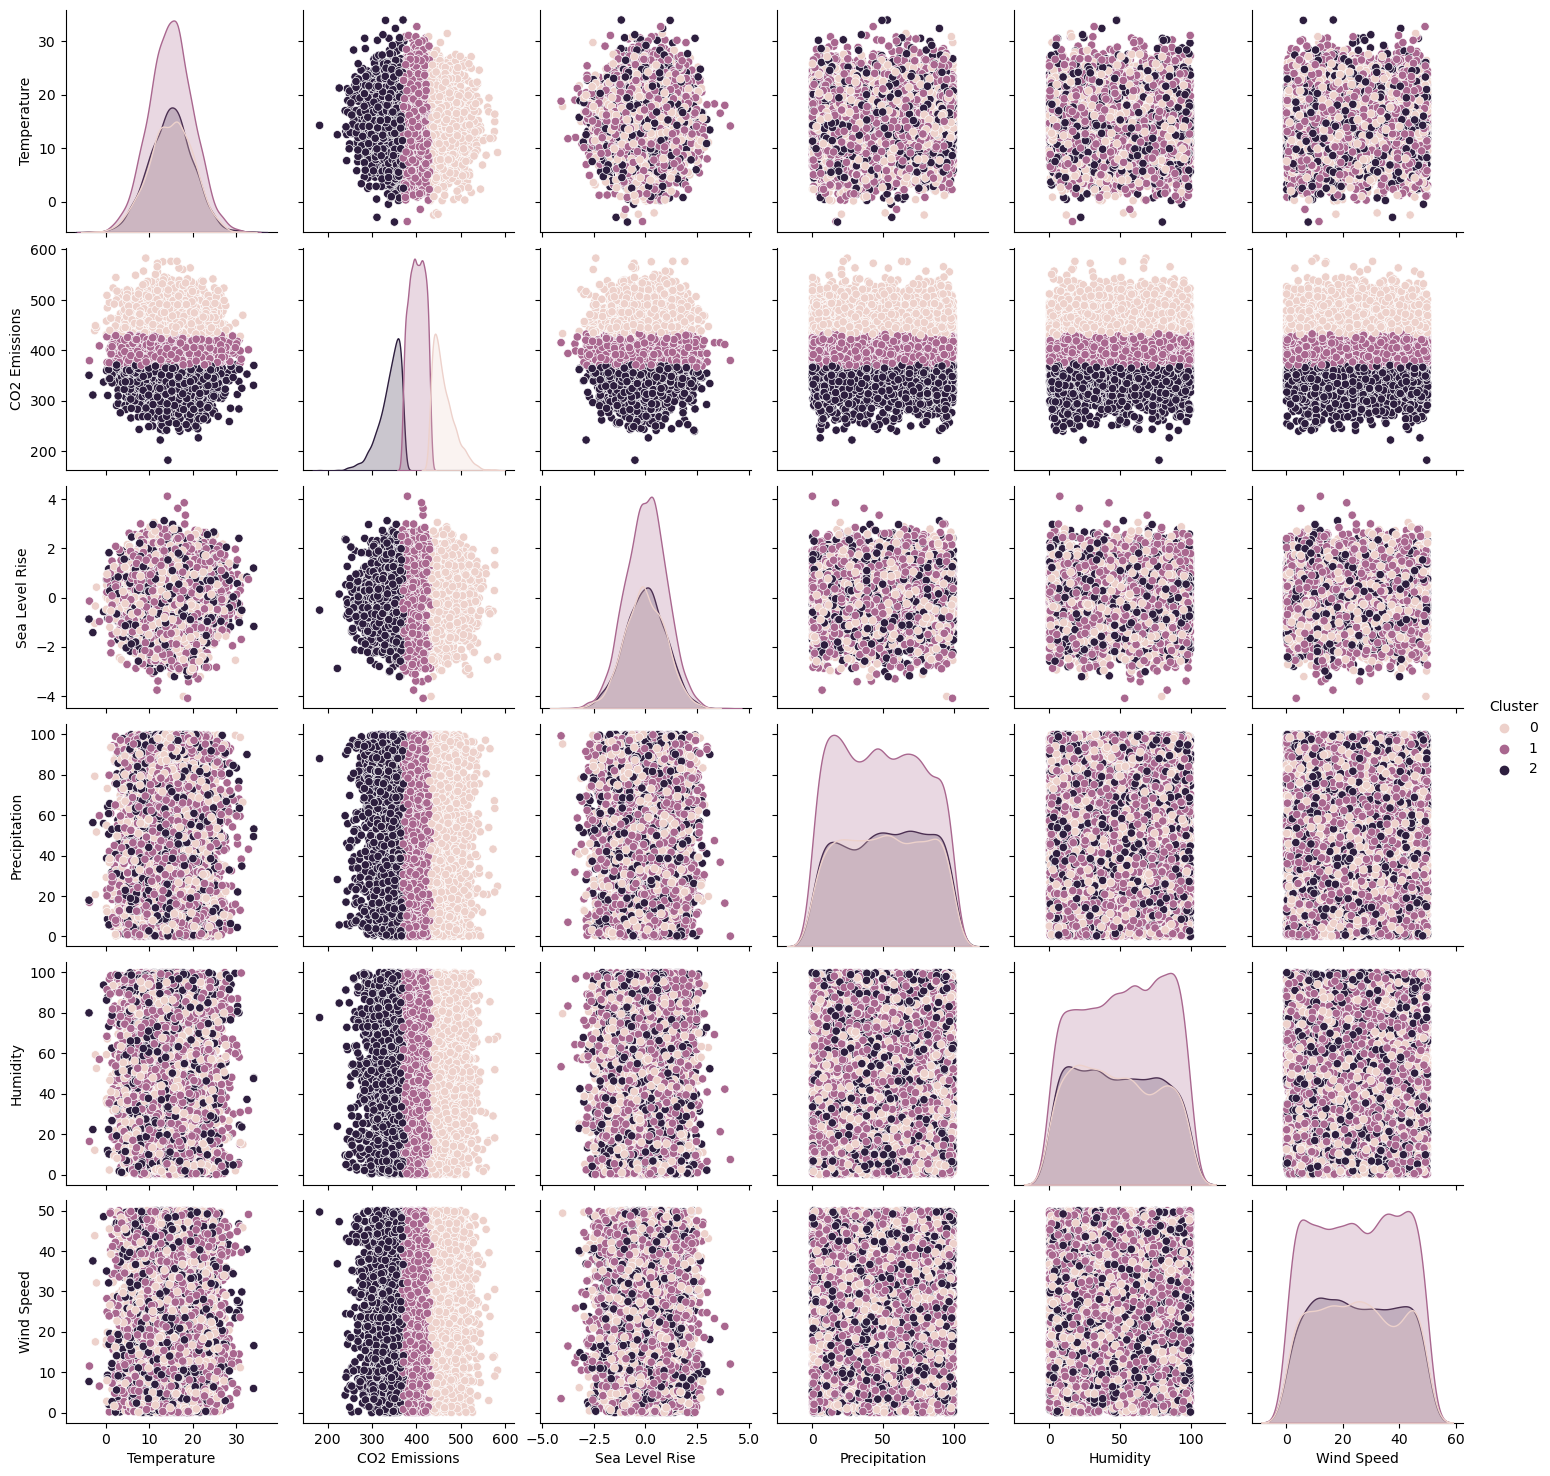

In [64]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
features = raw_df[['Temperature', 'CO2 Emissions', 'Sea Level Rise', 'Precipitation', 'Humidity', 'Wind Speed']]
raw_df['Cluster'] = kmeans.fit_predict(features)
sns.pairplot(raw_df, hue='Cluster')
plt.show()